# Balanceo del dataset

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import time 
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [7]:
covertype = fetch_ucirepo(id=31)


In [8]:
X = covertype.data.features
y = covertype.data.targets

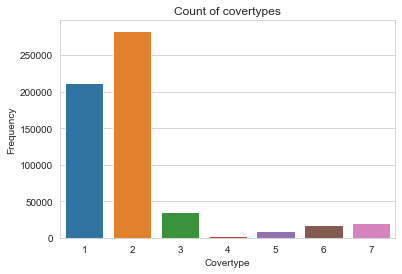

In [11]:
#Tabla de frecuencias de los covertypes
sns.set_style("whitegrid")
plt.title('Count of covertypes')
sns.countplot(x=y.Cover_Type)
plt.xlabel('Covertype')
plt.ylabel('Frequency')
plt.show()

A la luz del desbalanceo que tenemos en el covertype, donde los covertype 1 y 2 tienen una frecuencia mucho mas alta que las otras clases, vamos a aplicar metodos de desbalanceo para poder trabajar nuestros modelos de Machine Learning

## Técnica de sobremuestreo sintético de minorías(SMOTE)

La técnica de sobremuestreo sintético de minorías (SMOTE) es un potente método utilizado para tratar el desequilibrio de clases en los conjuntos de datos. SMOTE resuelve este problema generando muestras de clases minoritarias para equilibrar la distribución de clases. SMOTE funciona generando ejemplos sintéticos en el espacio de características de la clase minoritaria.
Procedimiento de trabajo de SMOTE:
    Identificación de ejemplos de clases minoritarias: SMOTE funciona en conjuntos de datos en los que una o más clases están significativamente infrarrepresentadas en comparación con otras. El primer paso consiste en identificar la clase o clases minoritarias en el conjunto de datos.
    Selección del vecino más próximo: Para cada clase minoritaria, SMOTE identifica sus k vecinos más cercanos en el espacio de características. El número de vecinos más próximos, denominado k, es un parámetro especificado por el usuario.
    Generación de muestras sintéticas: Para cada instancia de clase minoritaria, SMOTE selecciona aleatoriamente uno de sus k vecinos más cercanos. A continuación, genera muestras sintéticas a lo largo del segmento de línea que une el caso de clase minoritaria y el vecino más próximo seleccionado en el espacio de características.
    Sobremuestreo controlado: La cantidad de sobremuestreo se controla mediante un parámetro denominado proporción de sobremuestreo, que especifica la proporción deseada de muestras sintéticas con respecto a las muestras reales de la clase minoritaria. Por defecto, SMOTE intenta equilibrar la distribución de clases generando muestras sintéticas hasta que la clase minoritaria alcanza el mismo tamaño que la clase mayoritaria.
    Repetir para todas las clases minoritarias C


## ADASYN: método de muestreo sintético adaptativo

ADASYN, una extensión de la técnica SMOTE, también se utiliza para tratar conjuntos de datos desequilibrados. ADASYN se centra en las densidades locales de las clases minoritarias. Averigua las regiones en las que el desequilibrio es muy grave y aplica la estrategia para generar muestras sintéticas en ellas. Genera más muestras donde la densidad es alta y menos muestras donde la densidad es baja. Este enfoque es muy útil en situaciones en las que la distribución de clases varía en el espacio de características.
Procedimiento de trabajo de ADASYN

    Ratios de desequilibrio de clases: El paso inicial de ADASYN es calcular el ratio de clase minoritaria que se obtiene dividiendo el número de muestras de clase mayoritaria por el número de muestras de clase minoritaria.
    Hallar la distribución de densidad: Para cada instancia minoritaria, encontramos sus k vecinos más cercanos. A continuación, hallamos la distancia entre ellos utilizando métricas como la distancia Manhattan o la distancia euclidiana. Si las instancias están rodeadas por más vecinos cercanos, consideramos que la densidad es más alta; de lo contrario, la densidad se considera baja.
    Ratio de generación de muestras: Una vez calculados el ratio de desequilibrio de clases y la distribución de la densidad, calculamos el ratio de generación de muestras. Averigua cuántas muestras deben generarse para cada caso de clase minoritaria. Para densidades más altas e instancias desequilibradas más grandes, se generan más muestras sintéticas.
    Generación de muestras sintéticas: Combinando las instancias minoritarias con sus vecinos más cercanos, se generan nuevas muestras.
    Creación de conjuntos de datos equilibrados: Al combinar las nuevas muestras sintéticas con las instancias minoritarias originales, aumenta la frecuencia de las clases minoritarias. Esto equilibra el conjunto de datos y ayuda al modelo a aprender con mayor precisión.
    
    

In [110]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [11]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

KeyboardInterrupt: 

In [38]:
# Applying ADASYN
adasyn = ADASYN(random_state = 42)
X_train_ADA, y_train_ADA = adasyn.fit_resample(X_train, y_train)
# Count outcome values after applying ADASYN
y_train_ADA.value_counts()

Cover_Type
5             227081
6             226948
4             226836
2             226801
7             226673
1             225805
3             225453
dtype: int64

In [3]:
y_train.value_counts()


NameError: name 'y_train' is not defined

In [4]:
y.value_counts()

NameError: name 'y' is not defined

In [5]:
y_train_res.value_counts()

NameError: name 'y_train_res' is not defined

In [108]:
# Entrenar modelo
model = RandomForestClassifier(random_state = 42, n_estimators = 11)
start = time.process_time()  # Inicia el contador de CPU time
model.fit(X_train, y_train)
end = time.process_time()  # Finaliza el contador de CPU time
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

print(f"CPU Time: {end - start} segundos")

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy on training set: 0.998
Accuracy on test set: 0.945
CPU Time: 11.46875 segundos
              precision    recall  f1-score   support

           1       0.95      0.93      0.94     42557
           2       0.94      0.96      0.95     56500
           3       0.93      0.96      0.94      7121
           4       0.90      0.83      0.86       526
           5       0.92      0.75      0.83      1995
           6       0.92      0.86      0.89      3489
           7       0.97      0.94      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.93      0.89      0.91    116203
weighted avg       0.94      0.94      0.94    116203



In [31]:
# Entrenar modelo
model = RandomForestClassifier(random_state = 42, max_depth = 5)
model.fit(X_train_res, y_train_res)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_7620/1867543609.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_res, y_train_res)


              precision    recall  f1-score   support

           1       0.65      0.52      0.58     42557
           2       0.80      0.40      0.54     56500
           3       0.72      0.53      0.61      7121
           4       0.21      0.94      0.34       526
           5       0.06      0.82      0.12      1995
           6       0.36      0.64      0.46      3489
           7       0.25      0.92      0.40      4015

    accuracy                           0.49    116203
   macro avg       0.44      0.68      0.43    116203
weighted avg       0.69      0.49      0.54    116203



In [39]:
# Entrenar modelo 
model = RandomForestClassifier(random_state = 42, max_depth = 5)
model.fit(X_train_ADA, y_train_ADA)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\ALEJAN~1\AppData\Local\Temp/ipykernel_7620/1705256680.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_ADA, y_train_ADA)


              precision    recall  f1-score   support

           1       0.67      0.40      0.50     42557
           2       0.78      0.43      0.56     56500
           3       0.62      0.82      0.71      7121
           4       0.37      0.59      0.46       526
           5       0.07      0.83      0.12      1995
           6       0.30      0.30      0.30      3489
           7       0.20      0.98      0.33      4015

    accuracy                           0.47    116203
   macro avg       0.43      0.62      0.42    116203
weighted avg       0.68      0.47      0.52    116203



In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
model = KNeighborsClassifier(n_neighbors = 1)
start = time.process_time()  # Inicia el contador de CPU time

# Código a medir
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.process_time()  # Finaliza el contador de CPU time
print(f"CPU Time: {end - start} segundos")

print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [120]:
m = range(1,3)
for i in m:
    print(i)

1
2


In [122]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 3)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    print(f"Modelo {i}-NN hecho")

KeyboardInterrupt: 

In [16]:
import matplotlib
matplotlib.rc_file_defaults()

In [ ]:
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Bayesiano

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
model = BernoulliNB()
start = time.process_time()  # Inicia el contador de CPU time

# Código a medir
model.fit(X_train, y_train)

end = time.process_time()  # Finaliza el contador de CPU time
print(f"CPU Time: {end - start} segundos")

CPU Time: 0.6875 segundos


In [38]:
model = GaussianNB()
start = time.process_time()  # Inicia el contador de CPU time

# Código a medir
model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

end = time.process_time()  # Finaliza el contador de CPU time
print(f"CPU Time: {end - start} segundos")

Accuracy on training set: 0.459
Accuracy on test set: 0.457
CPU Time: 2.578125 segundos


In [39]:
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)

0.4590638305196328


In [40]:
# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy * 100:.2f}%")

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión: 45.69%
Matriz de confusión:
[[33126  1717   226     0  2237   129  5122]
 [31529  9011  3921    54 10994   327   664]
 [   19     9  5754  1187   109    43     0]
 [    0     0   101   425     0     0     0]
 [  413    33   319     0  1213    17     0]
 [  101     8  2575   317   197   291     0]
 [  671    26    17     0    30     0  3271]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.50      0.78      0.61     42557
           2       0.83      0.16      0.27     56500
           3       0.45      0.81      0.57      7121
           4       0.21      0.81      0.34       526
           5       0.08      0.61      0.14      1995
           6       0.36      0.08      0.14      3489
           7       0.36      0.81      0.50      4015

    accuracy                           0.46    116203
   macro avg       0.40      0.58      0.37    116203
weighted avg       0.64      0.46      0.41    116203



## Arbol de decision

Instalamos el paquete graphviz para visualizar el arbol
```{code cell}
pip install graphviz
```

In [71]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree


In [96]:
tree = DecisionTreeClassifier(random_state = 42, max_depth = 12)

start = time.process_time()  # Inicia el contador de CPU time
tree.fit(X_train, y_train)
end = time.process_time()  # Finaliza el contador de CPU time
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


print(f"CPU Time: {end - start} segundos")

Accuracy on training set: 0.815
Accuracy on test set: 0.808
CPU Time: 4.09375 segundos


In [82]:
y_pred = tree.predict(X_test)
# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy * 100:.2f}%")

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión: 80.79%
Matriz de confusión:
[[33406  8751     0     0    42     0   358]
 [ 6782 49058   331     0   134   154    41]
 [    0   568  5256    50     5  1242     0]
 [    0     0    73   365     0    88     0]
 [   98  1257    16     0   622     2     0]
 [    3   976   534    19     3  1954     0]
 [  748    51     0     0     0     0  3216]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.81      0.78      0.80     42557
           2       0.81      0.87      0.84     56500
           3       0.85      0.74      0.79      7121
           4       0.84      0.69      0.76       526
           5       0.77      0.31      0.44      1995
           6       0.57      0.56      0.56      3489
           7       0.89      0.80      0.84      4015

    accuracy                           0.81    116203
   macro avg       0.79      0.68      0.72    116203
weighted avg       0.81      0.81      0.81    116203



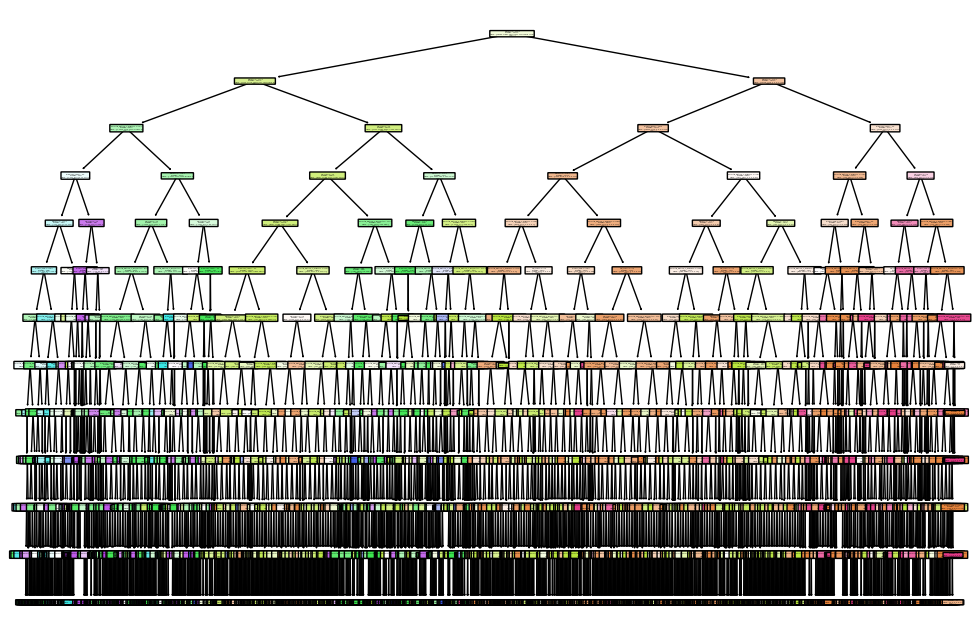

In [97]:
plt.figure(figsize=(12, 8))
plot_tree(
    tree,
    class_names=["1", "2", "3", "4", "5", "6", "7"],
    feature_names=X.columns,
    filled=True,
    rounded=True,
    impurity = False
)
plt.show()

In [98]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[5.13764107e-01 1.00408453e-02 4.00149523e-03 4.97485194e-02
 2.00246982e-02 1.01214979e-01 1.32085020e-02 2.49199775e-02
 7.79182030e-03 9.43614233e-02 1.04265890e-02 2.32822142e-05
 1.65316401e-02 3.44175425e-03 2.14531579e-02 5.11928485e-04
 1.66267069e-04 0.00000000e+00 0.00000000e+00 1.91994906e-04
 1.42141640e-03 1.44889314e-03 0.00000000e+00 7.36405716e-04
 4.67859126e-05 0.00000000e+00 1.23578978e-04 1.80205763e-04
 0.00000000e+00 0.00000000e+00 3.11314216e-03 6.59788446e-04
 1.17712653e-02 1.13897129e-02 3.32130200e-03 5.70762080e-05
 0.00000000e+00 4.95368327e-04 0.00000000e+00 8.61382487e-03
 2.55492042e-04 5.25707604e-03 1.65275970e-02 2.53505559e-03
 5.07035641e-04 1.50202969e-03 0.00000000e+00 0.00000000e+00
 2.90268208e-03 5.02995445e-03 9.64364870e-04 6.13742744e-03
 1.97301073e-02 3.44942987e-03]


In [103]:
def plot_feature_importances_cancer(model):
    n_features = 54
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

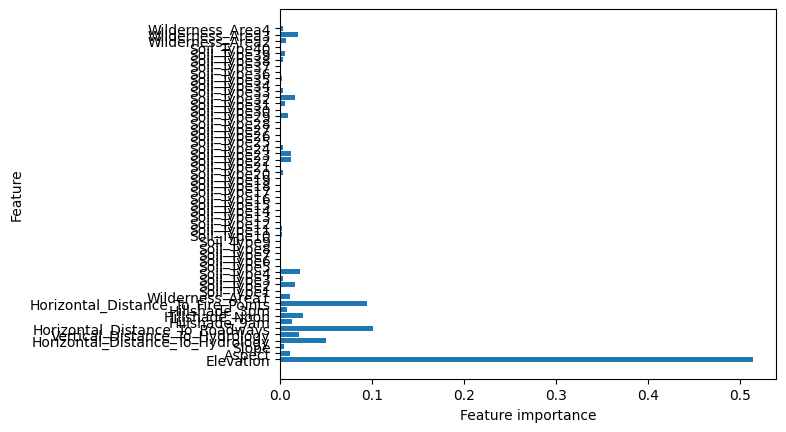

In [104]:
plot_feature_importances_cancer(tree)

## Random Forest

In [112]:
# Entrenar modelo
rTree = RandomForestClassifier(random_state = 42, n_estimators = 100)
start = time.process_time()  # Inicia el contador de CPU time
rTree.fit(X_train, y_train)
end = time.process_time()  # Finaliza el contador de CPU time
print("Accuracy on training set: {:.3f}".format(rTree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rTree.score(X_test, y_test)))

print(f"CPU Time: {end - start} segundos")

# Evaluar
y_pred = rTree.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy on training set: 1.000
Accuracy on test set: 0.955
CPU Time: 108.640625 segundos
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.97      0.96      7121
           4       0.92      0.85      0.89       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



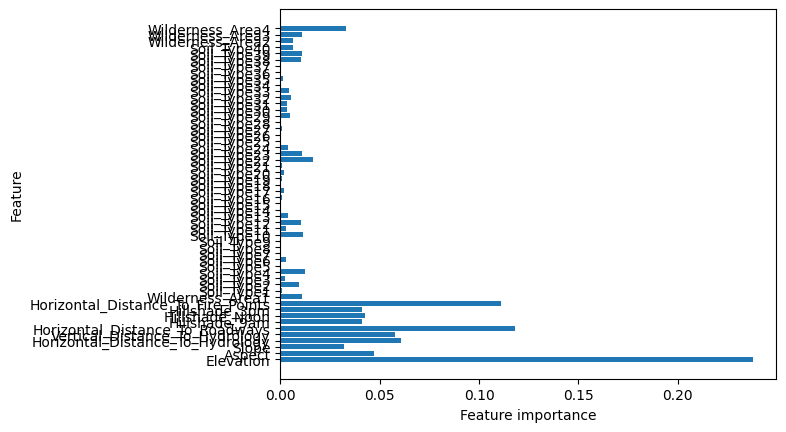

In [113]:
plot_feature_importances_cancer(rTree)